# **Drug Discovery [Part 5] using KNN**

In **Part 5**, we will be building a regression model of acetylcholinesterase inhibitors using the KNN algorithm


---

## **1. Import libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor



## **2. Load the data set**

In [ ]:
df = pd.read_csv('/content/H3N1_Descriptor_IWSSR_Scaled.csv')
X1 = df.drop('Unnamed: 0', axis=1)
X1

,MW,LogP,NumHDonors,PubchemFP2,PubchemFP3,PubchemFP6,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,...,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824,PubchemFP839,PubchemFP842,PubchemFP860,PubchemFP863,pIC50
0,-0.262890,-1.911570,2.545291,0.532524,-0.459639,-0.29767,0.220863,-1.331989,-0.220863,0.622171,...,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863,-0.189483
1,-0.288683,-0.643764,1.563699,0.532524,-0.459639,-0.29767,0.220863,-1.331989,-0.220863,0.622171,...,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,1.705606,2.369680,-0.848528,4.527693,0.235179
2,-0.845597,-1.703369,0.582107,-1.877849,-0.459639,-0.29767,0.220863,-1.331989,-0.220863,0.622171,...,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863,-1.098052
3,-0.580063,-0.294631,0.091311,0.532524,-0.459639,-0.29767,0.220863,-1.331989,-0.220863,0.622171,...,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863,1.700238
4,-0.394522,-0.118095,-0.399485,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863,0.068845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.062234,0.686329,-0.890281,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,2.369680,1.178511,-0.220863,-1.046362
82,-0.348286,0.208965,-0.890281,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,2.369680,1.178511,-0.220863,-1.680254
83,1.592832,1.614519,1.563699,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863,-1.003172
84,-0.394522,-0.118095,-0.399485,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,4.527693,-0.532524,2.091650,4.024922,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863,-1.530502


## **3. Input features**
The ***Coronavirus*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [ ]:
X = X1.drop('pIC50', axis=1)
X

,MW,LogP,NumHDonors,PubchemFP2,PubchemFP3,PubchemFP6,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,...,PubchemFP800,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824,PubchemFP839,PubchemFP842,PubchemFP860,PubchemFP863
0,-0.262890,-1.911570,2.545291,0.532524,-0.459639,-0.29767,0.220863,-1.331989,-0.220863,0.622171,...,-0.362738,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863
1,-0.288683,-0.643764,1.563699,0.532524,-0.459639,-0.29767,0.220863,-1.331989,-0.220863,0.622171,...,-0.362738,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,1.705606,2.369680,-0.848528,4.527693
2,-0.845597,-1.703369,0.582107,-1.877849,-0.459639,-0.29767,0.220863,-1.331989,-0.220863,0.622171,...,-0.362738,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863
3,-0.580063,-0.294631,0.091311,0.532524,-0.459639,-0.29767,0.220863,-1.331989,-0.220863,0.622171,...,2.756810,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863
4,-0.394522,-0.118095,-0.399485,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,2.756810,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.062234,0.686329,-0.890281,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,-0.362738,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,2.369680,1.178511,-0.220863
82,-0.348286,0.208965,-0.890281,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,-0.362738,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,2.369680,1.178511,-0.220863
83,1.592832,1.614519,1.563699,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,2.756810,-0.220863,-0.532524,-0.478091,-0.248452,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863
84,-0.394522,-0.118095,-0.399485,0.532524,-0.459639,-0.29767,0.220863,0.750757,-0.220863,0.622171,...,-0.362738,4.527693,-0.532524,2.091650,4.024922,-0.220863,-0.586302,-0.421998,-0.848528,-0.220863


### **3.2. Output features**

In [ ]:
Y = df.pIC50
Y

0    -0.189483
1     0.235179
2    -1.098052
3     1.700238
4     0.068845
        ...   
81   -1.046362
82   -1.680254
83   -1.003172
84   -1.530502
85    0.873788
Name: pIC50, Length: 86, dtype: float64

### **3.3. Let's examine the data dimension**

In [ ]:
X.shape

(86, 305)

In [ ]:
Y.shape

(86,)

### **3.4. Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [ ]:
X.shape

(86, 306)

## **4. Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((68, 305), (68,))

In [ ]:
X_test.shape, Y_test.shape

((18, 305), (18,))

## **5. Building a Regression Model using Random Forest**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
knn = KNeighborsRegressor()
# knn.fit(X_train, Y_train)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, Y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best R² score: {grid_search.best_score_:.2f}')

Y_pred=grid_search.best_estimator_.predict(X_test)
mse= mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("MSE Score:",mse, "\nR2 Score:",r2)


Best parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best R² score: 0.35
MSE Score: 0.5236337891237185 
R2 Score: 0.47361960481669996


## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

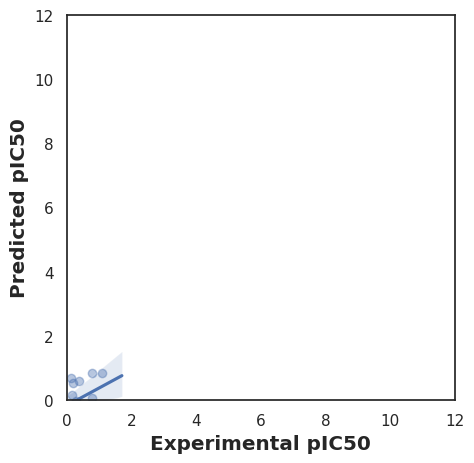

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()